In [1]:
import pandas as pd

# (did) prepare target_based data

In [100]:
target_data = pd.read_csv('./data/hitdexter3_data/data_target-based.csv', header=None)
target_data.head()

,0,1,2
0,BrC(Br)C(Br)Br,0.0,19
1,Brc1c(OCCCn2ccnc2)ccc2ccccc12,0.0,1
2,Brc1cc2c(cc1CN1CCN(c3ccccn3)CC1)OCCO2,0.0,2
3,Brc1ccc(-c2cc(-c3ccc4ccccc4c3)nc(-c3ccc4ccccc4...,0.0,1
4,Brc1ccc(-c2cc(-c3ccccc3)nc(NCc3ccccc3)n2)cc1,0.0,1


In [101]:
target_data.shape

(1489043, 3)

In [102]:
print("Counts of each value in column 1:")
print(target_data[1].value_counts())

Counts of each value in column 1:
1
0.0     1293195
1.0      109170
2.0       38042
3.0       17490
4.0       10056
         ...   
54.0          2
75.0          2
63.0          2
76.0          1
60.0          1
Name: count, Length: 65, dtype: int64


In [103]:
(target_data[2] > 100).sum()

np.int64(332653)

In [104]:
print("\nValue counts for column 2:")
print(target_data[2].value_counts())



Value counts for column 2:
2
1      441384
2      311549
3       65004
4       46978
5       38321
        ...  
256         4
254         4
255         3
257         1
260         1
Name: count, Length: 258, dtype: int64


In [105]:
target_data.columns = ['smiles', 'active', 'tested']



In [106]:
target_data.head()

,smiles,active,tested
0,BrC(Br)C(Br)Br,0.0,19
1,Brc1c(OCCCn2ccnc2)ccc2ccccc12,0.0,1
2,Brc1cc2c(cc1CN1CCN(c3ccccn3)CC1)OCCO2,0.0,2
3,Brc1ccc(-c2cc(-c3ccc4ccccc4c3)nc(-c3ccc4ccccc4...,0.0,1
4,Brc1ccc(-c2cc(-c3ccccc3)nc(NCc3ccccc3)n2)cc1,0.0,1


In [107]:
target_data['ATR'] = target_data['active'] / target_data['tested']

In [108]:
print("ATR statistics:")
print(target_data['ATR'].describe())
print("\nATR value counts:")


ATR statistics:
count    1.489043e+06
mean     6.602098e-03
std      5.930869e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: ATR, dtype: float64

ATR value counts:


In [109]:
target_data.head()

,smiles,active,tested,ATR
0,BrC(Br)C(Br)Br,0.0,19,0.0
1,Brc1c(OCCCn2ccnc2)ccc2ccccc12,0.0,1,0.0
2,Brc1cc2c(cc1CN1CCN(c3ccccn3)CC1)OCCO2,0.0,2,0.0
3,Brc1ccc(-c2cc(-c3ccc4ccccc4c3)nc(-c3ccc4ccccc4...,0.0,1,0.0
4,Brc1ccc(-c2cc(-c3ccccc3)nc(NCc3ccccc3)n2)cc1,0.0,1,0.0


In [110]:
num_atr_zero = (target_data['ATR'] == 0).sum()
perc_atr_zero = num_atr_zero / len(target_data) * 100
print(f"Number of compounds with ATR of 0: {num_atr_zero}")
print(f"Percentage of compounds with ATR of 0: {perc_atr_zero:.2f}%")


Number of compounds with ATR of 0: 1293195
Percentage of compounds with ATR of 0: 86.85%


In [111]:
target_data_tested100plus = target_data[target_data['tested'] > 100]
target_data_tested100plus.shape

(332653, 4)

In [112]:
num_atr_zero = (target_data_tested100plus['ATR'] == 0).sum()
perc_atr_zero = num_atr_zero / len(target_data_tested100plus) * 100
print(f"Number of compounds with ATR of 0: {num_atr_zero}")
print(f"Percentage of compounds with ATR of 0: {perc_atr_zero:.2f}%")

Number of compounds with ATR of 0: 171182
Percentage of compounds with ATR of 0: 51.46%


In [113]:
print("ATR statistics:")
print(target_data_tested100plus['ATR'].describe())
print("\nATR value counts:")

ATR statistics:
count    332653.000000
mean          0.006725
std           0.015451
min           0.000000
25%           0.000000
50%           0.000000
75%           0.007752
max           0.439024
Name: ATR, dtype: float64

ATR value counts:


In [114]:
def label_atr(atr):
    if atr < 0.007:
        return 'NPROM'
    elif atr > 0.053:
        return 'HPROM'
    elif atr > 0.022:
        return 'PROM'
    else:
        return None

target_data_tested100plus['ATR_label'] = target_data_tested100plus['ATR'].apply(label_atr)


/tmp/ipykernel_585437/3422154696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data_tested100plus['ATR_label'] = target_data_tested100plus['ATR'].apply(label_atr)


In [115]:
target_data_tested100plus.ATR_label.value_counts()

ATR_label
NPROM    245253
PROM      17525
HPROM      5227
Name: count, dtype: int64

In [116]:
atr_label_counts = target_data_tested100plus['ATR_label'].value_counts()
atr_label_percentages = atr_label_counts / len(target_data_tested100plus) * 100
print("Percentage of each ATR_label:")
print(atr_label_percentages)


Percentage of each ATR_label:
ATR_label
NPROM    73.726376
PROM      5.268253
HPROM     1.571307
Name: count, dtype: float64


In [51]:
num_none_atr_label = target_data_tested100plus['ATR_label'].isna().sum()
print(f"Number of compounds with ATR_label as None: {num_none_atr_label}")


Number of compounds with ATR_label as None: 64648


In [117]:
target_data_tested100plus = target_data_tested100plus[target_data_tested100plus['ATR_label'].notna()]
target_data_tested100plus.shape

(268005, 5)

In [118]:
atr_label_counts = target_data_tested100plus['ATR_label'].value_counts()
atr_label_percentages = atr_label_counts / len(target_data_tested100plus) * 100
print("Percentage of each ATR_label:")
print(atr_label_percentages)

Percentage of each ATR_label:
ATR_label
NPROM    91.510606
PROM      6.539057
HPROM     1.950337
Name: count, dtype: float64


In [53]:
target_data_tested100plus.head()

,smiles,active,tested,ATR,ATR_label
9,Brc1ccc(-c2nn3c(-c4ccco4)nnc3s2)o1,17.0,218,0.077982,HPROM
11,Brc1ccc(-c2nnc(-c3cccc(Br)c3)o2)cc1,1.0,210,0.004762,NPROM
22,Brc1ccc(N=NC(=NNc2nn[nH]n2)c2ccccc2)cc1,20.0,192,0.104167,HPROM
34,Brc1cccc(-c2nnc3n2CCC3)c1,0.0,239,0.000000,NPROM
41,Brc1cnc(N2CCCC2)nc1N1CCOCC1,1.0,231,0.004329,NPROM


In [60]:
target_data_tested100plus = target_data_tested100plus.reset_index(drop=True)
target_data_tested100plus['id'] = target_data_tested100plus.index + 1

# Move 'id' to the second column
cols = list(target_data_tested100plus.columns)
# Remove 'id' and insert it after the first column
cols.remove('id')
cols.insert(1, 'id')
target_data_tested100plus = target_data_tested100plus[cols]


In [61]:
target_data_tested100plus.to_csv('data/hitdexter3_data/data_target-based_tested100plus.csv', index=False)

In [67]:
# mmpdb can not handle the class label, so change class label to 0, 1, 2
target_data_tested100plus['ATR_label_num'] = target_data_tested100plus['ATR_label'].map({'NPROM': 0, 'PROM': 1, 'HPROM': 2})
target_data_tested100plus[['id', 'ATR_label_num']].to_csv('data/hitdexter3_data/data_target_data_tested100plus_id_label.txt', sep='\t', index=False)

# (did) generate MMP database

In [57]:
! mmpdb help-smiles-format

This explains how the `--delimiter` and `--has-header` options of the `mmpdb
fragment` command affect SMILES parsing.

The mmpdb program supports the most common variants of a SMILES file. Every
SMILES file stores line-oriented records, with the SMILES in the first field
and the id (also called the title) in the second field. However, there are
differences in how to handle the first line of the file, and in how to
distinguish which is the second field. Some people use the first line to store
a header for each column in the file.

The classic Daylight SMILES file had no header line and interprets the each
line as a SMILES string followed by a whitespace followed by the id/title. The
id is the rest of the line, which means it may include space and tabs. This is
useful if you have identifiers with a space in them, like IUPAC names or
common names like "vitamin D".

A common variant is to treat the SMILES file as a CSV file, that is, with at
least two columns separated by a space, tab, or 

In [ ]:
! mmpdb fragment data/hitdexter3_data/data_target-based_tested100plus.csv -o data/hitdexter3_data/data_target-based_tested100plus_data.fragdb --delimiter comma --has-header
# ~20mins

Preparing record 0[13:09:49] Explicit valence for atom # 10 P, 7, is greater than permitted
Preparing record 2597[13:09:50] Explicit valence for atom # 7 P, 7, is greater than permitted
Preparing record 3886[13:09:51] Explicit valence for atom # 19 P, 7, is greater than permitted
Preparing record 5187[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] [13:09:51] DEPRECATION WARNING: DEPRECATION WARNING: please use GetValence(which=)please use GetValence(which=)

[13:09:51] DEPRE

In [ ]:
! mmpdb index data/hitdexter3_data/data_target-based_tested100plus_data.fragdb -o data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb
# ~16mins

In [ ]:
# add properties to the fragment database
! mmpdb loadprops -p data/hitdexter3_data/data_target_data_tested100plus_id_label.txt data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb 
# ~8mins

Using dataset: MMPs from 'data/hitdexter3_data/data_target-based_tested100plus_data.fragdb'
Reading properties from 'data/hitdexter3_data/data_target_data_tested100plus_id_label.txt'
Read 1 properties for 268005 compounds from 'data/hitdexter3_data/data_target_data_tested100plus_id_label.txt'
18463 compounds from 'data/hitdexter3_data/data_target_data_tested100plus_id_label.txt' are not in the dataset at 'data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb'
Imported 249542 'ATR_label_num' records (249542 new, 0 updated).
Number of rule statistics added: 62685168 updated: 0 deleted: 0      
Loaded all properties and re-computed all rule statistics.


# check MMP results

In [1]:
import pandas as pd
import sqlite3

# Connect to the mmpdb database
conn = sqlite3.connect('data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb')

# Get all table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Read each table into a dataframe and store in a dictionary
dfs = {}
for table in tables:
    dfs[table] = pd.read_sql_query(f"SELECT * FROM {table}", conn)

# Unpack each dataframe into its own variable named df_<table>
for table, df in dfs.items():
    globals()[f"df_{table}"] = df

conn.close()
# ~5mins

In [2]:
dfs.keys()

dict_keys(['dataset', 'compound', 'property_name', 'compound_property', 'rule_smiles', 'rule', 'environment_fingerprint', 'rule_environment', 'constant_smiles', 'pair', 'rule_environment_statistics', 'sqlite_stat1'])

In [3]:
dfs['dataset']

,id,mmpdb_version,title,creation_date,fragment_options,index_options,is_symmetric,num_compounds,num_rules,num_pairs,num_rule_environments,num_rule_environment_stats
0,1,4,MMPs from 'data/hitdexter3_data/data_target-ba...,2025-09-30 13:34:33.982001,"{""max_heavies"": 100, ""max_rotatable_bonds"": 10...","{""max_variable_heavies"": 10, ""min_radius"": 0, ...",0,249542,8911116,77062878,62685168,62685168


In [4]:
dfs['rule']

,id,from_smiles_id,to_smiles_id
0,1,1,2
1,2,3,2
2,3,3,1
3,4,4,5
4,5,6,7
...,...,...,...
8911111,8911112,159080,510
8911112,8911113,159080,10458
8911113,8911114,159080,11767
8911114,8911115,159080,14040


In [5]:
# Check for duplicate 'id' in dfs['rule']
duplicate_rule_ids = dfs['rule']['id'].duplicated().sum()
print(f"Number of duplicate 'id' values in dfs['rule']: {duplicate_rule_ids}")
if duplicate_rule_ids > 0:
    print("Duplicate 'id' values found in dfs['rule']!")
else:
    print("No duplicate 'id' values in dfs['rule'].")


Number of duplicate 'id' values in dfs['rule']: 0
No duplicate 'id' values in dfs['rule'].


In [ ]:
dfs['rule_smiles']

,id,smiles,num_heavies
0,1,[*:1]/C=C\C=C\N(C)C,7
1,2,[*:1]/C=C\N(C)C,5
2,3,[*:1]/C=C\C=C\C=C\N(C)C,9
3,4,[*:1]/C=C\[*:2],2
4,5,[*:1]/C=C\C=C\[*:2],4
...,...,...,...
159075,159076,[*:1]C(SC)C1CCCC1,8
159076,159077,[*:1]C1CCCCC1Cl,7
159077,159078,[*:1]CNc1nonc1C,8
159078,159079,[*:1]CCCC(=O)NCC(=O)O,10


In [7]:
dfs['rule_smiles'].num_heavies.value_counts()

num_heavies
10    60808
9     41404
8     26908
7     15889
6      8288
5      3693
4      1512
3       473
2        89
1        15
0         1
Name: count, dtype: int64

In [8]:
df_rule_smiles_small = dfs['rule_smiles'][dfs['rule_smiles']['num_heavies'] < 5]
len(df_rule_smiles_small)

2090

In [9]:
df_rule_smiles_small

,id,smiles,num_heavies
3,4,[*:1]/C=C\[*:2],2
4,5,[*:1]/C=C\C=C\[*:2],4
6,7,[*:1]/C=C\N([*:2])C,4
9,10,[*:1]/C=C\N([*:2])[*:3],3
36,37,[*:1]C#N,2
...,...,...,...
158909,158910,[*:1]SC=C,3
158910,158911,[*:1][S+]([O-])C=C,4
158972,158973,[*:1]CC(=C)Br,4
159014,159015,[*:1]CCCBr,4


In [10]:
import ipywidgets as widgets
from IPython.display import display
from rdkit import Chem

def show_rule_smiles(idx):
    smiles = df_rule_smiles_small.sort_values('num_heavies').smiles.iloc[idx]
    print(f"Index: {idx}")
    print(smiles)
    mol = Chem.MolFromSmiles(smiles)
    display(mol)

slider = widgets.IntSlider(
    value=0, 
    min=0, 
    max=len(df_rule_smiles_small)-1, 
    step=1, 
    description='iloc idx:', 
    continuous_update=False
)

widgets.interact(show_rule_smiles, idx=slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='iloc idx:', max=2089), Output()…

<function __main__.show_rule_smiles(idx)>

In [11]:
dfs['compound']

,id,public_id,input_smiles,clean_smiles,clean_num_heavies
0,1,178747,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,19
1,2,104193,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,17
2,3,189599,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,21
3,4,255313,Cc1ccc(C)c(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)...,Cc1ccc(C)c(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)...,30
4,5,153066,COc1cccc(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)[n...,COc1cccc(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)[n...,30
...,...,...,...,...,...
249537,249538,206117,COc1ccc(C)cc1-n1nnnc1SCC(=O)NNC(=O)c1ccc([N+](...,COc1ccc(C)cc1-n1nnnc1SCC(=O)NNC(=O)c1ccc([N+](...,31
249538,249539,213594,O=C(CSc1nnnn1-c1ccc(Cl)cc1)NNC(=O)c1ccc([N+](=...,O=C(CSc1nnnn1-c1ccc(Cl)cc1)NNC(=O)c1ccc([N+](=...,29
249539,249540,245966,O=C(CSc1nnnn1-c1cccc2ccccc12)Nc1ccc(N2CCOCC2)c...,O=C(CSc1nnnn1-c1cccc2ccccc12)Nc1ccc(N2CCOCC2)c...,33
249540,249541,197599,O=C(CSc1nnnn1-c1ccc(O)cc1)Nc1cccc(S(=O)(=O)N2C...,O=C(CSc1nnnn1-c1ccc(O)cc1)Nc1cccc(S(=O)(=O)N2C...,31


In [12]:
dfs['property_name']

,id,name
0,0,ATR_label_num


In [13]:
dfs['compound_property']

,id,compound_id,property_name_id,value
0,1,242634,0,2.0
1,2,12719,0,0.0
2,3,243314,0,2.0
3,4,12740,0,0.0
4,5,227731,0,0.0
...,...,...,...,...
249537,249538,229652,0,0.0
249538,249539,217463,0,0.0
249539,249540,136275,0,0.0
249540,249541,136295,0,0.0


In [14]:
dfs['rule']

,id,from_smiles_id,to_smiles_id
0,1,1,2
1,2,3,2
2,3,3,1
3,4,4,5
4,5,6,7
...,...,...,...
8911111,8911112,159080,510
8911112,8911113,159080,10458
8911113,8911114,159080,11767
8911114,8911115,159080,14040


In [15]:
dfs['pair']

,id,rule_environment_id,compound1_id,compound2_id,constant_id
0,1,1,1,2,1
1,2,2,1,2,1
2,3,3,1,2,1
3,4,4,1,2,1
4,5,5,1,2,1
...,...,...,...,...,...
77062873,77062874,37157484,219672,229397,562586
77062874,77062875,62685165,219672,229397,562586
77062875,77062876,62685166,219672,229397,562586
77062876,77062877,62685167,219672,229397,562586


In [ ]:
# # For each pair, get: pair id, constant smiles, compound1 smiles, compound2 smiles, value1 (property_name_id=0), value2 (property_name_id=1)

# # We'll join: pair, constant_smiles, compound, compound_property

# # Output as a DataFrame

# query = """
# SELECT
#     pair.id AS pair_id,
#     pair.constant_id AS constant_id,
#     constant_smiles.smiles AS constant_smiles,
#     pair.compound1_id AS compound1_id,
#     c1.input_smiles AS compound1_smiles,
#     pair.compound2_id AS compound2_id,
#     c2.input_smiles AS compound2_smiles,
#     pair.rule_environment_id AS rule_environment_id,
#     re.rule_id,
#     rs.smiles AS rule_smiles,
#     rs.num_heavies AS rule_smiles_num_heavies,
#     re.environment_fingerprint_id,
#     re.radius,
#     re.num_pairs,
#     ef.smarts AS environment_fingerprint_smarts,
#     ef.parent_smarts AS environment_fingerprint_parent_smarts,
#     cp1.value AS value_c1,  -- property_name_id = 0
#     cp2.value AS value_c2   -- property_name_id = 0

# FROM pair
# JOIN constant_smiles ON pair.constant_id = constant_smiles.id
# LEFT JOIN compound AS c1 ON pair.compound1_id = c1.id
# LEFT JOIN compound AS c2 ON pair.compound2_id = c2.id
# LEFT JOIN compound_property AS cp1 ON cp1.compound_id = pair.compound1_id AND cp1.property_name_id = 0
# LEFT JOIN compound_property AS cp2 ON cp2.compound_id = pair.compound2_id AND cp2.property_name_id = 0
# LEFT JOIN rule_environment AS re ON pair.rule_environment_id = re.id
# LEFT JOIN rule_smiles AS rs ON re.rule_id = rs.id
# LEFT JOIN environment_fingerprint AS ef ON re.environment_fingerprint_id = ef.id
# """

# conn = sqlite3.connect('data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb')
# df_pair_props = pd.read_sql_query(query, conn)
# conn.close()

# df_pair_props.head(20)


In [ ]:
# df_pair_props.to_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels.csv', sep='\t', index=False)

In [16]:
df_pair_props = pd.read_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels.csv', sep='\t')
df_pair_props.shape

(77062878, 16)

In [17]:
df_pair_props.head(20)

,pair_id,constant_id,constant_smiles,compound1_id,compound1_smiles,compound2_id,compound2_smiles,rule_environment_id,rule_id,environment_fingerprint_id,radius,num_pairs,environment_fingerprint_smarts,environment_fingerprint_parent_smarts,value_c1,value_c2
0,1,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,1,1,1,0,2,[#0;X1;H0;+0;!R:1],NaN,1.0,0.0
1,2,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,2,1,2,1,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],[#0;X1;H0;+0;!R:1],1.0,0.0
2,3,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,3,1,3,2,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],1.0,0.0
3,4,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,4,1,4,3,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,1.0,0.0
4,5,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,5,1,5,4,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,1.0,0.0
5,6,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,6,1,6,5,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,1.0,0.0
6,7,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,7,2,1,0,1,[#0;X1;H0;+0;!R:1],NaN,2.0,0.0
7,8,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,8,2,2,1,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],[#0;X1;H0;+0;!R:1],2.0,0.0
8,9,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,9,2,3,2,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],2.0,0.0
9,10,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,10,2,4,3,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,2.0,0.0


In [18]:
# Merge dfs['rule'] onto df_pair_props to add 'from_smiles_id' and 'to_smiles_id'
df_pair_props = df_pair_props.merge(
    dfs['rule'][['id', 'from_smiles_id', 'to_smiles_id']],
    left_on='rule_id',
    right_on='id',
    how='left'
).drop(columns=['id'])


In [19]:
# Merge dfs['rule_smiles'] onto df_pair_props to add 'from_smiles' and 'to_smiles'
df_pair_props = df_pair_props.merge(
    dfs['rule_smiles'][['id', 'smiles']],
    left_on='from_smiles_id',
    right_on='id',
    how='left'
).rename(columns={'smiles': 'from_smiles'}).drop(columns=['id'])

df_pair_props = df_pair_props.merge(
    dfs['rule_smiles'][['id', 'smiles']],
    left_on='to_smiles_id',
    right_on='id',
    how='left'
).rename(columns={'smiles': 'to_smiles'}).drop(columns=['id'])


In [20]:
df_pair_props.head(20)

,pair_id,constant_id,constant_smiles,compound1_id,compound1_smiles,compound2_id,compound2_smiles,rule_environment_id,rule_id,environment_fingerprint_id,radius,num_pairs,environment_fingerprint_smarts,environment_fingerprint_parent_smarts,value_c1,value_c2,from_smiles_id,to_smiles_id,from_smiles,to_smiles
0,1,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,1,1,1,0,2,[#0;X1;H0;+0;!R:1],NaN,1.0,0.0,1,2,[*:1]/C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
1,2,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,2,1,2,1,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],[#0;X1;H0;+0;!R:1],1.0,0.0,1,2,[*:1]/C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
2,3,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,3,1,3,2,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],1.0,0.0,1,2,[*:1]/C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
3,4,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,4,1,4,3,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,1.0,0.0,1,2,[*:1]/C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
4,5,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,5,1,5,4,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,1.0,0.0,1,2,[*:1]/C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
5,6,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,1,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,6,1,6,5,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,1.0,0.0,1,2,[*:1]/C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
6,7,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,7,2,1,0,1,[#0;X1;H0;+0;!R:1],NaN,2.0,0.0,3,2,[*:1]/C=C\C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
7,8,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,8,2,2,1,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],[#0;X1;H0;+0;!R:1],2.0,0.0,3,2,[*:1]/C=C\C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
8,9,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,9,2,3,2,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R],2.0,0.0,3,2,[*:1]/C=C\C=C\C=C\N(C)C,[*:1]/C=C\N(C)C
9,10,1,[*:1]/C(=C(/C(C)=O)C(=O)OC)N(C)C,3,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,2,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,10,2,4,3,1,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,[#0;X1;H0;+0;!R:1]-[C;X3;H0;+0;!R](=[C;X3;H0;+...,2.0,0.0,3,2,[*:1]/C=C\C=C\C=C\N(C)C,[*:1]/C=C\N(C)C


In [21]:
df_pair_props.radius.value_counts()

radius
0    12843813
1    12843813
2    12843813
3    12843813
4    12843813
5    12843813
Name: count, dtype: int64

In [22]:
df_pair_props[df_pair_props['num_pairs']>100].rule_id.nunique()

2521

In [23]:
df_pair_props[df_pair_props['num_pairs']>100].rule_environment_id.nunique()


5578

In [25]:
df_pair_props[(df_pair_props['num_pairs']>100)].rule_environment_id.unique()

array([     138,      240,      262, ..., 62507563, 62588032, 62648333])

In [27]:
df_pair_props[(df_pair_props['rule_environment_id'] == 262)]

,pair_id,constant_id,constant_smiles,compound1_id,compound1_smiles,compound2_id,compound2_smiles,rule_environment_id,rule_id,environment_fingerprint_id,radius,num_pairs,environment_fingerprint_smarts,environment_fingerprint_parent_smarts,value_c1,value_c2,from_smiles_id,to_smiles_id,from_smiles,to_smiles
270,271,20,[*:1]/C(=C/c1ccccc1)C(=O)NCCN1CCOCC1,31,C/C(=C\c1ccccc1)C(=O)NCCN1CCOCC1,32,N#C/C(=C\c1ccccc1)C(=O)NCCN1CCOCC1,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
7840260,7840261,86973,[*:1]C(C)Sc1nnc(Nc2ccccc2)s1,124532,CC(C)Sc1nnc(Nc2ccccc2)s1,15293,CC(C#N)Sc1nnc(Nc2ccccc2)s1,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
8067036,8067037,94803,[*:1]C(NC(=O)OCc1ccccc1)c1ccccc1,126632,CC(NC(=O)OCc1ccccc1)c1ccccc1,14720,N#CC(NC(=O)OCc1ccccc1)c1ccccc1,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
35852172,35852173,229477,[*:1]C1C=Cc2cc(C)ccc2N1C(=O)c1ccccc1,189491,Cc1ccc2c(c1)C=CC(C)N2C(=O)c1ccccc1,189492,Cc1ccc2c(c1)C=CC(C#N)N2C(=O)c1ccccc1,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
35852178,35852179,229478,[*:1]C1C=Cc2ccccc2N1C(=O)c1ccccc1,189493,CC1C=Cc2ccccc2N1C(=O)c1ccccc1,41289,N#CC1C=Cc2ccccc2N1C(=O)c1ccccc1,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74938236,74938237,539912,[*:1]c1ccccc1OCC(=O)OCC(=O)Nc1ccc2c(c1)OCO2,88608,Cc1ccccc1OCC(=O)OCC(=O)Nc1ccc2c(c1)OCO2,111683,N#Cc1ccccc1OCC(=O)OCC(=O)Nc1ccc2c(c1)OCO2,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
74938320,74938321,539919,[*:1]c1ccccc1OCC(=O)OCC(=O)c1c[nH]c2ccccc12,20364,Cc1ccccc1OCC(=O)OCC(=O)c1c[nH]c2ccccc12,13781,N#Cc1ccccc1OCC(=O)OCC(=O)c1c[nH]c2ccccc12,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
74938344,74938345,539921,[*:1]c1ccccc1OCC(=O)OCC(=O)c1ccc[nH]1,20362,Cc1ccccc1OCC(=O)OCC(=O)c1ccc[nH]1,13785,N#Cc1ccccc1OCC(=O)OCC(=O)c1ccc[nH]1,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N
75571284,75571285,542644,[*:1]c1cn(Cc2ccccc2)c(=O)[nH]c1=O,165848,Cc1cn(Cc2ccccc2)c(=O)[nH]c1=O,14683,N#Cc1cn(Cc2ccccc2)c(=O)[nH]c1=O,262,43,1,0,150,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,39,37,[*:1]C,[*:1]C#N


In [28]:
df_pair_props[(df_pair_props['rule_id'] == 40) & (df_pair_props['radius'] == 0)]
# rule id need to combine with radius, the same rule_id can have different radius, different number of pairs, the number of pairs are counted by rule environment!
# this rule_id at radius 0 has 123 pairs


,pair_id,constant_id,constant_smiles,compound1_id,compound1_smiles,compound2_id,compound2_smiles,rule_environment_id,rule_id,environment_fingerprint_id,radius,num_pairs,environment_fingerprint_smarts,environment_fingerprint_parent_smarts,value_c1,value_c2,from_smiles_id,to_smiles_id,from_smiles,to_smiles
246,247,16,[*:1]/C(=C/N(C)C)c1cnc(Cl)s1,23,Cc1ccc(S(=O)(=O)/C(=C\N(C)C)c2cnc(Cl)s2)cc1,24,CN(C)/C=C(\c1cnc(Cl)s1)S(=O)(=O)c1ccccc1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
7407744,7407745,73621,[*:1]C(C#N)c1nc2ccccc2nc1N1CCCC1,119835,Cc1ccc(S(=O)(=O)C(C#N)c2nc3ccccc3nc2N2CCCC2)cc1,16111,N#CC(c1nc2ccccc2nc1N1CCCC1)S(=O)(=O)c1ccccc1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,2.0,2.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
7407960,7407961,73624,[*:1]C(C#N)c1nc2ccccc2nc1N1CCN(C)CC1,119837,Cc1ccc(S(=O)(=O)C(C#N)c2nc3ccccc3nc2N2CCN(C)CC...,119838,CN1CCN(c2nc3ccccc3nc2C(C#N)S(=O)(=O)c2ccccc2)CC1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
7586694,7586695,79546,[*:1]C(C)C(=O)NCCS(=O)(=O)c1ccc(Cl)cc1,122943,Cc1ccc(S(=O)(=O)C(C)C(=O)NCCS(=O)(=O)c2ccc(Cl)...,122944,CC(C(=O)NCCS(=O)(=O)c1ccc(Cl)cc1)S(=O)(=O)c1cc...,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
8287308,8287309,99344,[*:1]C(c1ccccc1)c1c(C)noc1C,135550,Cc1ccc(S(=O)(=O)C(c2ccccc2)c2c(C)noc2C)cc1,135982,Cc1noc(C)c1C(c1ccccc1)S(=O)(=O)c1ccccc1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75887730,75887731,546336,[*:1]c1nc(NCCN(C)C)sc1Cl,149758,Cc1ccc(S(=O)(=O)c2nc(NCCN(C)C)sc2Cl)cc1,148186,CN(C)CCNc1nc(S(=O)(=O)c2ccccc2)c(Cl)s1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
75903006,75903007,546724,[*:1]c1nc(S(=O)(=O)c2ccc(C)cc2)c(N2CCN(CCO)CC2)s1,238776,Cc1ccc(S(=O)(=O)c2nc(S(=O)(=O)c3ccc(C)cc3)c(N3...,229371,Cc1ccc(S(=O)(=O)c2nc(S(=O)(=O)c3ccccc3)sc2N2CC...,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
75905454,75905455,546823,[*:1]c1nc(SC)sc1Cl,167373,CSc1nc(S(=O)(=O)c2ccc(C)cc2)c(Cl)s1,167374,CSc1nc(S(=O)(=O)c2ccccc2)c(Cl)s1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1
76313814,76313815,549053,[*:1]c1ncccc1N,184201,Cc1ccc(S(=O)(=O)c2ncccc2N)cc1,226512,Nc1cccnc1S(=O)(=O)c1ccccc1,240,40,1,0,110,[#0;X1;H0;+0;!R:1],NaN,0.0,0.0,34,35,[*:1]S(=O)(=O)c1ccc(C)cc1,[*:1]S(=O)(=O)c1ccccc1


In [32]:
len(df_pair_props)

77062878

In [29]:
#TODO: number of heavies? 

In [30]:
df_pair_props[(df_pair_props['rule_id'] == 40) & (df_pair_props['radius'] == 5)][['rule_environment_id','num_pairs']].drop_duplicates()

,rule_environment_id,num_pairs
251,245,1
7407749,5108436,2
7586699,5253307,1
8287313,5831331,1
35573303,29788703,1
...,...,...
75887735,61891842,1
75903011,61901201,1
75905459,61902542,1
76313819,62247236,1


In [85]:
df_pair_props.to_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info.csv', sep='\t', index=False)

In [203]:
dfs['rule_smiles']

,id,smiles,num_heavies
0,1,[*:1]/C=C\C=C\N(C)C,7
1,2,[*:1]/C=C\N(C)C,5
2,3,[*:1]/C=C\C=C\C=C\N(C)C,9
3,4,[*:1]/C=C\[*:2],2
4,5,[*:1]/C=C\C=C\[*:2],4
...,...,...,...
159075,159076,[*:1]C(SC)C1CCCC1,8
159076,159077,[*:1]C1CCCCC1Cl,7
159077,159078,[*:1]CNc1nonc1C,8
159078,159079,[*:1]CCCC(=O)NCC(=O)O,10


In [208]:
# Map from_smiles_id and to_smiles_id in df_pair_props to num_heavies from dfs['rule_smiles']
id_to_num_heavies = dfs['rule_smiles'].set_index('id')['num_heavies']

df_pair_props['from_num_heavies'] = df_pair_props['from_smiles_id'].map(id_to_num_heavies)
df_pair_props['to_num_heavies'] = df_pair_props['to_smiles_id'].map(id_to_num_heavies)

In [211]:
df_pair_props['diff_num_heavies'] = df_pair_props['to_num_heavies'] - df_pair_props['from_num_heavies']

In [213]:
# Add a column 'num_attach_points' by counting '*' in from_smiles

# Count number of '*' (attach points) in from_smiles_str
df_pair_props['num_attach_points'] = df_pair_props['from_smiles'].str.count('\*')


In [219]:
df_pair_props.num_attach_points.value_counts()

num_attach_points
2    35421636
1    31282608
3    10358634
Name: count, dtype: int64

In [216]:
df_pair_props.to_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info_version2.csv', sep='\t', index=False)

In [220]:
len(df_pair_props), len(df_pair_props[df_pair_props['num_pairs'] >= 20])

(77062878, 3801792)

In [221]:
df_pair_props[df_pair_props['num_pairs'] >= 20].to_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info_version2_num_pairs_20.csv', sep='\t', index=False)

## can read file from here

2025-10-30 revsion from here in new notebook: hitdexter3_data_mmp.ipynb

In [ ]:
df_pair_props = pd.read_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels_more_info.csv', sep='\t')

In [53]:
# Get rule_environment_id and num_pairs as a dictionary, sorted by num_pairs descending
rule_env_num_pairs = df_pair_props[['rule_environment_id', 'num_pairs', 'rule_id', 'radius']].drop_duplicates()
rule_env_num_pairs_sorted = rule_env_num_pairs.sort_values('num_pairs', ascending=False)

# Create dictionary
rule_env_num_pairs_dict = dict(zip(rule_env_num_pairs_sorted['rule_environment_id'], rule_env_num_pairs_sorted['num_pairs']))

# Show statistics about the distribution of num_pairs
import numpy as np
import pandas as pd

num_pairs_series = rule_env_num_pairs_sorted['num_pairs']

stats = {
    'count': num_pairs_series.count(),
    'min': num_pairs_series.min(),
    'max': num_pairs_series.max(),
    'mean': num_pairs_series.mean(),
    'median': num_pairs_series.median(),
    'std': num_pairs_series.std(),
    'quantiles': num_pairs_series.quantile([0.25, 0.5, 0.75]).to_dict(),
    # 'value_counts_head': num_pairs_series.value_counts().head(10)
}

print("Top 10 rule_environment_id by num_pairs:")
print(rule_env_num_pairs_sorted.head(10))
print("\nStatistics of num_pairs distribution:")
for k, v in stats.items():
    print(f"{k}: {v}")


Top 10 rule_environment_id by num_pairs:
          rule_environment_id  num_pairs  rule_id  radius
276                       268      28312       44       0
35735245             29939130      14926       44       1
7434126               5122287      12628   640557       0
35743111             29941446      12052   640557       1
528                       497       9557       80       0
35762617             29951816       9449       80       1
7401445               5102765       7613       44       1
191592                 127858       7107    16435       0
53502602             42011154       7076       44       2
7936962               5546789       6440   701216       0

Statistics of num_pairs distribution:
count: 62685168
min: 1
max: 28312
mean: 1.2293638265434657
median: 1.0
std: 6.896120211040544
quantiles: {0.25: 1.0, 0.5: 1.0, 0.75: 1.0}


In [56]:
print(rule_env_num_pairs_sorted[rule_env_num_pairs_sorted['num_pairs'] > 1000])

          rule_environment_id  num_pairs  rule_id  radius
276                       268      28312       44       0
35735245             29939130      14926       44       1
7434126               5122287      12628   640557       0
35743111             29941446      12052   640557       1
528                       497       9557       80       0
...                       ...        ...      ...     ...
38682                   28155       1023     3910       0
5514                     4762       1011      748       0
39864024             32971890       1008  4760440       0
53462443             41983800       1007  4760440       1
44897029             36791395       1004       44       1

[147 rows x 4 columns]


In [57]:
print(rule_env_num_pairs_sorted[(rule_env_num_pairs_sorted['num_pairs'] > 1000)&(rule_env_num_pairs_sorted['radius'] == 0)])

          rule_environment_id  num_pairs  rule_id  radius
276                       268      28312       44       0
7434126               5122287      12628   640557       0
528                       497       9557       80       0
191592                 127858       7107    16435       0
7936962               5546789       6440   701216       0
...                       ...        ...      ...     ...
61254                   41586       1062     5442       0
36936                   26776       1032     3740       0
38682                   28155       1023     3910       0
5514                     4762       1011      748       0
39864024             32971890       1008  4760440       0

[78 rows x 4 columns]


In [60]:
# How many rule environments have num_pairs > 500 and radius == 1?
count = ((rule_env_num_pairs_sorted['num_pairs'] > 500) & (rule_env_num_pairs_sorted['radius'] == 1)).sum()
print(f"Number of rule_environment_ids with num_pairs > 500 and radius == 1: {count}")
# Optionally, print the rows as well:
#print(rule_env_num_pairs_sorted[(rule_env_num_pairs_sorted['num_pairs'] > 500)&(rule_env_num_pairs_sorted['radius'] == 1)])

Number of rule_environment_ids with num_pairs > 500 and radius == 1: 56


In [61]:
# How many rule environments have num_pairs > 200 and radius == 1?
count = ((rule_env_num_pairs_sorted['num_pairs'] > 200) & (rule_env_num_pairs_sorted['radius'] == 1)).sum()
print(f"Number of rule_environment_ids with num_pairs > 500 and radius == 1: {count}")

Number of rule_environment_ids with num_pairs > 500 and radius == 1: 345


In [81]:
import ipywidgets as widgets
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import Draw

def mmp_pair_viewer(rule_environment_id_to_show, df_pair_props, slider_kwargs=None):
    """
    Interactive viewer of matched pairs for a given rule_environment_id.

    Parameters:
    -----------
    rule_environment_id_to_show : int
        The rule_environment_id to visualize.
    df_pair_props : pd.DataFrame
        DataFrame containing the environment pairs and properties.
    slider_kwargs : dict or None
        Optional dictionary of extra arguments for the IntSlider.
    """
    df_pair_props_env_ruleX = df_pair_props[
        df_pair_props['rule_environment_id'] == rule_environment_id_to_show
    ].reset_index(drop=True)

    def show_mmp_row(idx):
        row = df_pair_props_env_ruleX.iloc[idx]
        smiles1 = row.get('compound1_smiles', None)
        smiles2 = row.get('compound2_smiles', None)
        constant_smiles = row.get('constant_smiles', None)
        env_smarts = row.get('environment_fingerprint_smarts', None)
        radius = row.get('radius', None)
        # fallback for column names if needed
        if smiles1 is None or smiles2 is None or constant_smiles is None:
            # try fallback column names
            smiles1 = row.get('smiles1', None)
            smiles2 = row.get('smiles2', None)
            constant_smiles = row.get('constant_smiles', None)
        display_text = []
        mols = []
        labels = []

        # Draw constant_smiles
        if constant_smiles:
            mol_c = Chem.MolFromSmiles(str(constant_smiles))
            if mol_c:
                mols.append(mol_c)
                labels.append("Constant fragment")
                display_text.append(f"constant_smiles: {constant_smiles}")
            else:
                display_text.append(f"Failed to parse constant_smiles: {constant_smiles}")

        # Draw compound1
        if smiles1:
            mol1 = Chem.MolFromSmiles(str(smiles1))
            if mol1:
                mols.append(mol1)
                labels.append("Compound 1")
                display_text.append(f"compound1_smiles: {smiles1}")
            else:
                display_text.append(f"Failed to parse compound1_smiles: {smiles1}")

        # Draw compound2
        if smiles2:
            mol2 = Chem.MolFromSmiles(str(smiles2))
            if mol2:
                mols.append(mol2)
                labels.append("Compound 2")
                display_text.append(f"compound2_smiles: {smiles2}")
            else:
                display_text.append(f"Failed to parse compound2_smiles: {smiles2}")
       
        # Display values from other fields, e.g. value_c1, value_c2, etc.
        add_cols = ['value_c1', 'value_c2', 'constant_id']
        for col in add_cols:
            if col in row:
                display_text.append(f"{col}: {row[col]}")

        # Draw molecules if any could be parsed
        if len(mols) > 0:
            # Try to align the molecules to a common core, if possible, for the first 3 (exclude smarts/mol fragments for environment/rule)
            core_alignment_max = 3  # only try alignment on constant, compound1, compound2
            do_alignment = sum([1 for m in mols[:core_alignment_max] if m is not None]) > 1

            if do_alignment:
                from rdkit.Chem import rdFMCS
                try:
                    # Only use the SMILES-based molecules for MCS
                    alignment_mols = [m for m in mols[:core_alignment_max] if m is not None]
                    # Find the maximum common substructure (MCS) among the molecules
                    mcs_result = rdFMCS.FindMCS(alignment_mols, completeRingsOnly=True, ringMatchesRingOnly=True, timeout=5)
                    mcs_smarts = mcs_result.smartsString
                    core = Chem.MolFromSmarts(mcs_smarts)
                    if core is not None:
                        core_for_depict = Chem.Mol(core)
                        Chem.rdDepictor.Compute2DCoords(core_for_depict)
                        for m in alignment_mols:
                            Chem.rdDepictor.GenerateDepictionMatching2DStructure(m, core_for_depict)
                except Exception as e:
                    display_text.append(f"MCS-based depiction alignment failed: {e}")

            if env_smarts and isinstance(env_smarts, str) and env_smarts.strip() != "" and env_smarts.lower() != 'nan':
                try:
                    env_mol = Chem.MolFromSmarts(env_smarts)
                    display_text.append(f"Env fingerprint: {env_smarts}")
                    if env_mol:
                        mols.append(env_mol)
                        labels.append(f"Env fingerprint")
                    else:
                        display_text.append(f"Failed to parse env_fingerprint_smarts: {env_smarts}")
                except Exception as e:
                    display_text.append(f"Exception parsing env_fingerprint_smarts: {env_smarts} : {e}")

            # Always add radius to the display_text list after displaying env_smarts
            display_text.append(f"radius: {radius}")

            # Display associated information
            display_text.insert(0, f"Index: {idx}")
            for tx in display_text:
                print(tx)

            # Draw the "from_smiles" and "to_smiles" as molecules if they exist in the row
            from_to_mols = []
            from_to_labels = []
            if 'from_smiles' in row and isinstance(row['from_smiles'], str):
                from_mol = Chem.MolFromSmiles(row['from_smiles'])
                if from_mol:
                    from_to_mols.append(from_mol)
                    from_to_labels.append("From")
            if 'to_smiles' in row and isinstance(row['to_smiles'], str):
                to_mol = Chem.MolFromSmiles(row['to_smiles'])
                if to_mol:
                    from_to_mols.append(to_mol)
                    from_to_labels.append("To")
            if from_to_mols:
                from_to_grid = Draw.MolsToGridImage(from_to_mols, legends=from_to_labels, molsPerRow=len(from_to_mols), subImgSize=(200, 200))
                display(from_to_grid)

            # Draw the molecules in a grid
            img = Draw.MolsToGridImage(mols, legends=labels, molsPerRow=len(mols), subImgSize=(300, 300))
            display(img)
        else:
            print("Could not parse any molecules in this row.")

    # Handle the case where no rows exist for the given rule_environment_id
    if df_pair_props_env_ruleX.shape[0] == 0:
        print(f"No rows to display for rule_environment_id={rule_environment_id_to_show}!")
        return

    slider_opts = dict(
        min=0, 
        max=len(df_pair_props_env_ruleX)-1,
        step=1,
        value=0,
        description='Row idx',
        continuous_update=False
    )
    if slider_kwargs is not None:
        slider_opts.update(slider_kwargs)

    widgets.interact(
        show_mmp_row,
        idx=widgets.IntSlider(**slider_opts)
    )

# Usage example:
# mmp_pair_viewer(268, df_pair_props)

In [82]:
mmp_pair_viewer(268, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=28311), Output())…

In [83]:
mmp_pair_viewer(29939130, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=14925), Output())…

In [84]:
mmp_pair_viewer(5122287, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=12627), Output())…

In [94]:
df_pair_props[df_pair_props['rule_id'] == 1].to_csv('data/hitdexter3_data/data_target_data_tested100plus_rule_1.csv', sep='\t', index=False)

In [125]:
df_pair_props_env_ruleX = df_pair_props[
    df_pair_props['rule_environment_id'] == 5122287
].reset_index(drop=True)

In [126]:
len(df_pair_props_env_ruleX)

12628

In [127]:
print(df_pair_props_env_ruleX['value_c1'].value_counts())
print(df_pair_props_env_ruleX['value_c2'].value_counts())

value_c1
0.0    11844
1.0      615
2.0      169
Name: count, dtype: int64
value_c2
0.0    11840
1.0      635
2.0      153
Name: count, dtype: int64


In [128]:
from collections import Counter

# Compute value pairs
value_pairs = list(zip(df_pair_props_env_ruleX['value_c1'], df_pair_props_env_ruleX['value_c2']))
pair_counts = Counter(value_pairs)

# Display counts for all combinations of 0, 1, 2
possible_values = [0.0, 1.0, 2.0]
print("Counts for all value combinations (c1, c2):")
for v1 in possible_values:
    for v2 in possible_values:
        count = pair_counts.get((v1, v2), 0)
        print(f"({int(v1)}, {int(v2)}): {count}")



Counts for all value combinations (c1, c2):
(0, 0): 11634
(0, 1): 201
(0, 2): 9
(1, 0): 191
(1, 1): 371
(1, 2): 53
(2, 0): 15
(2, 1): 63
(2, 2): 91


In [129]:
# Calculate and print the percentage of each value pair count
total_pairs = len(value_pairs)
print("Percentage of each value pair (c1, c2):")
for v1 in possible_values:
    for v2 in possible_values:
        count = pair_counts.get((v1, v2), 0)
        percentage = (count / total_pairs * 100) if total_pairs else 0
        print(f"({int(v1)}, {int(v2)}): {count} ({percentage:.2f}%)")

Percentage of each value pair (c1, c2):
(0, 0): 11634 (92.13%)
(0, 1): 201 (1.59%)
(0, 2): 9 (0.07%)
(1, 0): 191 (1.51%)
(1, 1): 371 (2.94%)
(1, 2): 53 (0.42%)
(2, 0): 15 (0.12%)
(2, 1): 63 (0.50%)
(2, 2): 91 (0.72%)


In [130]:
# Calculate and print the percentage of each value pair count
# Merge 1 and 2 as one class (i.e., treat all 1.0 and 2.0 as "PROM")
def merge_class(x):
    if x == 0.0:
        return 0.0  # NPROM
    else:
        return 1.0  # PROM (merging 1.0 and 2.0 together)

# Remap and recount with merged classes
merged_value_pairs = [(merge_class(v1), merge_class(v2)) for v1, v2 in value_pairs]
merged_pair_counts = Counter(merged_value_pairs)
total_pairs_merged = len(merged_value_pairs)

print("Percentage of each merged value pair (c1, c2):")
for v1 in [0.0, 1.0]:
    for v2 in [0.0, 1.0]:
        count = merged_pair_counts.get((v1, v2), 0)
        percentage = (count / total_pairs_merged * 100) if total_pairs_merged else 0
        print(f"({int(v1)}, {int(v2)}): {count} ({percentage:.2f}%)")

Percentage of each merged value pair (c1, c2):
(0, 0): 11634 (92.13%)
(0, 1): 210 (1.66%)
(1, 0): 206 (1.63%)
(1, 1): 578 (4.58%)


In [137]:
len(df_pair_props)

77062878

In [136]:
df_pair_props['rule_environment_id'].nunique()

62685168

In [141]:
# Filter and display only rule_environment_ids with at least 20 pair
df_pair_props[df_pair_props['num_pairs'] >= 20]['rule_environment_id'].nunique()


69528

In [134]:
df_pair_props[['rule_environment_id','num_pairs','radius']]

,rule_environment_id,num_pairs,radius
0,1,2,0
1,2,1,1
2,3,1,2
3,4,1,3
4,5,1,4
...,...,...,...
77062873,37157484,118,1
77062874,62685165,1,2
77062875,62685166,1,3
77062876,62685167,1,4


In [144]:
# Compute statistics for every rule_environment_id in df_pair_props with at least 20 pairs,
# and combine value 1.0 and 2.0 as 1.0 ("PROM") and keep 0.0 as "NPROM".
from collections import Counter

def merge_class(x):
    if x == 0.0:
        return 0.0  # NPROM
    else:
        return 1.0  # PROM (merge 1.0 and 2.0)

results = []
possible_values = [0.0, 1.0]

# Work with only rule_environment_ids with at least 20 pairs
ids_with_20_or_more = df_pair_props[df_pair_props['num_pairs'] >= 20]['rule_environment_id'].unique()

for rule_env_id in ids_with_20_or_more:
    subdf = df_pair_props[df_pair_props['rule_environment_id'] == rule_env_id]
    # Merge value classes for both c1 and c2
    merged_value_pairs = [(merge_class(v1), merge_class(v2)) for v1, v2 in zip(subdf['value_c1'], subdf['value_c2'])]
    pair_counts = Counter(merged_value_pairs)
    total_pairs = len(merged_value_pairs)
    stats = {
        'rule_environment_id': rule_env_id,
        'total_pairs': total_pairs,
    }
    for v1 in possible_values:
        for v2 in possible_values:
            count = pair_counts.get((v1, v2), 0)
            percentage = (count / total_pairs * 100) if total_pairs else 0
            stats[f'count_({int(v1)},{int(v2)})'] = count
            stats[f'perc_({int(v1)},{int(v2)})'] = percentage
    results.append(stats)

import pandas as pd
df_env_stats = pd.DataFrame(results)
print(df_env_stats.head())

df_env_stats.to_csv("data/hitdexter3_data/rule_env_20orMore_stats.csv", index=False)


   rule_environment_id  total_pairs  count_(0,0)  perc_(0,0)  count_(0,1)  \
0                  132           89           80   89.887640            3   
1                  138          123          107   86.991870            3   
2                  174           24           22   91.666667            0   
3                  234           50           45   90.000000            0   
4                  240          110          100   90.909091            1   

   perc_(0,1)  count_(1,0)  perc_(1,0)  count_(1,1)  perc_(1,1)  
0    3.370787            2    2.247191            4    4.494382  
1    2.439024            4    3.252033            9    7.317073  
2    0.000000            1    4.166667            1    4.166667  
3    0.000000            2    4.000000            3    6.000000  
4    0.909091            2    1.818182            7    6.363636  


In [143]:
df_env_stats = pd.DataFrame(results)
df_env_stats.head()

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)"
0,132,89,80,89.887640,3,3.370787,2,2.247191,4,4.494382
1,138,123,107,86.991870,3,2.439024,4,3.252033,9,7.317073
2,174,24,22,91.666667,0,0.000000,1,4.166667,1,4.166667
3,234,50,45,90.000000,0,0.000000,2,4.000000,3,6.000000
4,240,110,100,90.909091,1,0.909091,2,1.818182,7,6.363636


In [146]:
len(df_env_stats)

69528

In [149]:
# Get the radius for every rule_environment_id from df_pair_props

# For each rule_environment_id, get the (single) unique radius (safe if each id has a unique radius)
rule_env_to_radius = df_pair_props.groupby('rule_environment_id')['radius'].first().reset_index()

# Merge into df_env_stats
df_env_stats = df_env_stats.merge(rule_env_to_radius, on='rule_environment_id', how='left')

# Now df_env_stats has a "radius" column for every rule_environment_id



In [176]:
# Add the "rule_id" column for every rule_environment_id from df_pair_props
rule_env_to_rule_id = df_pair_props.groupby('rule_environment_id')['rule_id'].first().reset_index()
df_env_stats = df_env_stats.merge(rule_env_to_rule_id, on='rule_environment_id', how='left')


In [177]:
# Rows where perc_(0,0) == 100
perc_00_100 = df_env_stats[df_env_stats['perc_(0,0)'] == 100]
print("Number of rows with perc_(0,0) == 100:")
print(len(perc_00_100))

# Rows where perc_(1,1) == 100
perc_11_100 = df_env_stats[df_env_stats['perc_(1,1)'] == 100]
print("Number of rows with perc_(1,1) == 100:")
print(len(perc_11_100))


Number of rows with perc_(0,0) == 100:
20090
Number of rows with perc_(1,1) == 100:
0


In [178]:
# Get rows where neither perc_(0,0) nor perc_(1,1) is 100
not_100_mask = (df_env_stats['perc_(0,0)'] != 100) & (df_env_stats['perc_(1,1)'] != 100)
df_evn_stats_changed = df_env_stats[not_100_mask]
df_evn_stats_changed.sort_values("total_pairs", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id
7,268,28312,26227,92.635632,459,1.621221,337,1.190308,1289,4.552840,0,44
31976,29939130,14926,13674,91.611952,214,1.433740,217,1.453839,821,5.500469,1,44
17384,5122287,12628,11634,92.128603,210,1.662971,206,1.631296,578,4.577130,0,640557
32070,29941446,12052,11079,91.926651,208,1.725855,202,1.676070,563,4.671424,1,640557
26,497,9557,8738,91.430365,119,1.245161,199,2.082243,501,5.242231,0,80
32313,29951816,9449,8671,91.766324,116,1.227643,171,1.809715,491,5.196317,1,80
17060,5102765,7613,7272,95.520820,38,0.499146,52,0.683042,251,3.296992,1,44
3332,127858,7107,6649,93.555649,66,0.928662,80,1.125651,312,4.390038,0,16435
64504,42011154,7076,6496,91.803279,86,1.215376,95,1.342566,399,5.638779,2,44
19816,5546789,6440,6047,93.897516,70,1.086957,62,0.962733,261,4.052795,0,701216


In [179]:
df_evn_stats_changed.sort_values("perc_(0,1)", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id
21282,6100412,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,1,781483
10447,689134,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,1,98316
10446,689133,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,0,98316
21280,6100406,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,1,781482
21279,6100405,22,0,0.000000,19,86.363636,0,0.0,3,13.636364,0,781482
10445,689122,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,1,98314
33861,30594992,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,2,175369
10444,689121,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,0,98314
33862,30594993,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,3,175369
21278,6100400,20,0,0.000000,17,85.000000,0,0.0,3,15.000000,1,651715


In [180]:
df_evn_stats_changed.sort_values("perc_(1,0)", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id
44448,37420771,22,0,0.000000,0,0.0,21,95.454545,1,4.545455,3,70733
44449,37420772,22,0,0.000000,0,0.0,21,95.454545,1,4.545455,4,70733
44447,37420770,22,0,0.000000,0,0.0,21,95.454545,1,4.545455,2,70733
10448,689139,22,0,0.000000,0,0.0,19,86.363636,3,13.636364,0,98317
10449,689140,22,0,0.000000,0,0.0,19,86.363636,3,13.636364,1,98317
34154,30650272,32,6,18.750000,0,0.0,24,75.000000,2,6.250000,2,80
2040,34786,26,7,26.923077,0,0.0,19,73.076923,0,0.000000,0,4668
12539,965641,22,4,18.181818,0,0.0,16,72.727273,2,9.090909,1,136851
12538,965640,22,4,18.181818,0,0.0,16,72.727273,2,9.090909,0,136851
10462,689260,24,4,16.666667,0,0.0,17,70.833333,3,12.500000,1,98336


In [181]:
df_evn_stats_changed.sort_values("perc_(1,1)", ascending=False).head(20)

,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id
33853,30571235,24,3,12.500000,0,0.000000,2,8.333333,19,79.166667,1,87932
33854,30571240,24,3,12.500000,0,0.000000,2,8.333333,19,79.166667,1,843
64941,42160110,24,3,12.500000,0,0.000000,2,8.333333,19,79.166667,4,640557
33851,30571192,21,0,0.000000,0,0.000000,5,23.809524,16,76.190476,1,5397
33852,30571197,21,0,0.000000,5,23.809524,0,0.000000,16,76.190476,1,72300
33850,30571172,21,0,0.000000,0,0.000000,5,23.809524,16,76.190476,1,4379619
64940,42160108,21,0,0.000000,0,0.000000,5,23.809524,16,76.190476,4,638961
61098,40816084,21,0,0.000000,5,23.809524,0,0.000000,16,76.190476,5,44
22375,8325753,21,4,19.047619,1,4.761905,0,0.000000,16,76.190476,0,1084312
21284,6100418,24,0,0.000000,6,25.000000,0,0.000000,18,75.000000,1,781484


In [182]:
# Get rows where perc_(0,0) == 0 and perc_(1,1) == 0
both_zero = df_evn_stats_changed[(df_evn_stats_changed['perc_(0,0)'] == 0) & (df_evn_stats_changed['perc_(1,1)'] == 0)]
print("Rows where both perc_(0,0) and perc_(1,1) == 0:")
display(both_zero)

# Get rows where (perc_(0,0) == 0 or perc_(1,1) == 0) but not both
one_zero = df_evn_stats_changed[((df_evn_stats_changed['perc_(0,0)'] == 0) | (df_evn_stats_changed['perc_(1,1)'] == 0)) &
                                ~( (df_evn_stats_changed['perc_(0,0)'] == 0) & (df_evn_stats_changed['perc_(1,1)'] == 0) )]
print("Rows where exactly one of perc_(0,0) or perc_(1,1) == 0:")
display(one_zero)

Rows where both perc_(0,0) and perc_(1,1) == 0:


,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id


Rows where exactly one of perc_(0,0) or perc_(1,1) == 0:


,rule_environment_id,total_pairs,"count_(0,0)","perc_(0,0)","count_(0,1)","perc_(0,1)","count_(1,0)","perc_(1,0)","count_(1,1)","perc_(1,1)",radius,rule_id
10,280,96,93,96.875000,3,3.125000,0,0.000000,0,0.0,0,46
22,388,31,30,96.774194,0,0.000000,1,3.225806,0,0.0,0,63
24,485,182,162,89.010989,0,0.000000,20,10.989011,0,0.0,0,78
28,512,65,62,95.384615,3,4.615385,0,0.000000,0,0.0,0,82
31,546,46,45,97.826087,1,2.173913,0,0.000000,0,0.0,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...
69477,62644534,28,26,92.857143,0,0.000000,2,7.142857,0,0.0,2,71093
69493,62646796,36,32,88.888889,2,5.555556,2,5.555556,0,0.0,2,71964
69497,62646876,24,22,91.666667,0,0.000000,2,8.333333,0,0.0,2,1400
69504,62646975,21,20,95.238095,0,0.000000,1,4.761905,0,0.0,2,70061


In [ ]:

def mmp_rule_viewer(rule_environment_id_to_show, df_pair_props):
    """
    Show from_smiles and to_smiles for the first row of a given rule_environment_id,
    and display also rule_environment_id and radius.

    Parameters:
    -----------
    rule_environment_id_to_show : int
        The rule_environment_id to visualize.
    df_pair_props : pd.DataFrame
        DataFrame containing the environment pairs and properties.
    """
    df_pair_props_env_ruleX = df_pair_props[
        df_pair_props['rule_environment_id'] == rule_environment_id_to_show
    ].reset_index(drop=True)

    if df_pair_props_env_ruleX.shape[0] == 0:
        print(f"No rows to display for rule_environment_id={rule_environment_id_to_show}!")
        return

    row = df_pair_props_env_ruleX.iloc[0]
    display_text = []
    rule_id = row.get('rule_environment_id', None)
    radius = row.get('radius', None)
    display_text.append(f"rule_environment_id: {rule_id}")
    display_text.append(f"radius: {radius}")
    from_smiles = row.get('from_smiles', None)
    to_smiles = row.get('to_smiles', None)
    mols = []
    labels = []
    if from_smiles and isinstance(from_smiles, str):
        mol_from = Chem.MolFromSmiles(from_smiles)
        if mol_from:
            mols.append(mol_from)
            labels.append("From")
            display_text.append(f"from_smiles: {from_smiles}")
        else:
            display_text.append(f"Failed to parse from_smiles: {from_smiles}")
    if to_smiles and isinstance(to_smiles, str):
        mol_to = Chem.MolFromSmiles(to_smiles)
        if mol_to:
            mols.append(mol_to)
            labels.append("To")
            display_text.append(f"to_smiles: {to_smiles}")
        else:
            display_text.append(f"Failed to parse to_smiles: {to_smiles}")
    display_text.insert(0, f"Index: 0")
    for line in display_text:
        print(line)
    if mols:
        img = Draw.MolsToGridImage(mols, legends=labels, molsPerRow=len(mols), subImgSize=(250, 250))
        display(img)
    else:
        print("Could not parse any from_smiles or to_smiles in this row.")

# Usage example:
# mmp_rule_viewer(268, df_pair_props)

In [189]:
import ipywidgets as widgets
from IPython.display import display

# First, select a rule_id, then show all rule_environment_ids associated with that rule_id, pick a rule_environment_id, and show the rule

# Get all unique rule_ids from df_env_stats
rule_ids = df_env_stats['rule_id'].unique()
print(len(rule_ids))
rule_ids = sorted(rule_ids)

def rule_env_selector(rule_id):
    # Find all rule_environment_ids corresponding to this rule_id
    env_ids = df_env_stats[df_env_stats['rule_id'] == rule_id]['rule_environment_id'].unique()
    env_ids = sorted(env_ids)
    if not env_ids:
        print(f"No rule_environment_ids found for rule_id = {rule_id}")
        return
    def show_selected_rule(rule_env_id):
        mmp_rule_viewer(rule_env_id, df_pair_props)
    rule_env_slider = widgets.SelectionSlider(
        options=env_ids,
        description="rule_environment_id",
        continuous_update=False,
        orientation='horizontal',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='95%')
    )
    widgets.interact(show_selected_rule, rule_env_id=rule_env_slider)

# First dropdown/slider for rule_id
rule_id_slider = widgets.SelectionSlider(
    options=rule_ids,
    description='rule_id',
    continuous_update=False,
    orientation='horizontal',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='95%')
)

widgets.interact(rule_env_selector, rule_id=rule_id_slider)


23720


interactive(children=(SelectionSlider(continuous_update=False, description='rule_id', layout=Layout(width='95%…

<function __main__.rule_env_selector(rule_id)>

Index: 0
rule_environment_id: 37420771
radius: 3
from_smiles: [*:1]c1ccc(O)cc1
to_smiles: [*:1]c1ccccc1


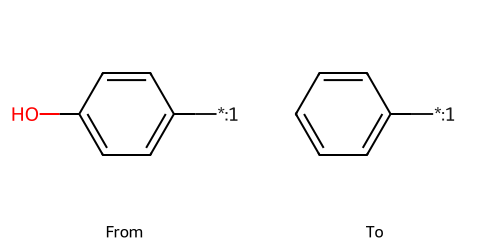

In [175]:
mmp_rule_viewer(37420771, df_pair_props)

In [160]:


mmp_pair_viewer(37420771, df_pair_props)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Row idx', max=21), Output()), _…

# End